# 01 - Introduction to Machine Learning

by [Alejandro Correa Bahnsen](albahnsen.com/)

version 0.2, May 2016

## Part of the class [Machine Learning for Risk Management](https://github.com/albahnsen/ML_RiskManagement)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Jake Vanderplas](http://www.vanderplas.com)

## What is Machine Learning?

In this section we will begin to explore the basic principles of machine learning.
Machine Learning is about building programs with **tunable parameters** (typically an
array of floating point values) that are adjusted automatically so as to improve
their behavior by **adapting to previously seen data.**

Machine Learning can be considered a subfield of **Artificial Intelligence** since those
algorithms can be seen as building blocks to make computers learn to behave more
intelligently by somehow **generalizing** rather that just storing and retrieving data items
like a database system would do.

### Type of Learning

Usually, ML problems can be classified according to the learning type:

1. **Supervised Learning:**

Supervised Learning models is the set of algorithms that tries to approximate a function $f(x)$ that represents the relation between a dependent variable $y$ (label) and an independent set of variables $X$. This carachteristic makes supervised algorithms a type of predictive models, such that given a set of $X$ data, can be forecasted a y variable. Some example of these algorithms are:


2. **Unsupervised Learning:**
    
Opposite to Supervised Learnig, in Unsupervised Learning dependent variable or labeled data is not included in the data set. Then insted of predict a variable, this set of algorithms try to use techniques in the input data to detect patterns, find rules, of summarize and group data. Usually, Unsupervised algorithms are mainly used in descriptive modelling and anlysis, where is particularly useful to find out insights and information that human expert doesn't know. Some algorithms commonly used:

k-means, Principal Component Analysis, Association Rules.

Despite these types of learning cover a vast amount of real world problems to analyze, there area other less usufulness learning implementations like Semi-Supervised Learning and Reinforcement 
Learnig, however these are outside the scope of this course. To read more about:

https://medium.com/machine-learning-for-humans/reinforcement-learning-6eacf258b265

#### 1. Supervised Learning



In [1]:
# Import libraries
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('ggplot')

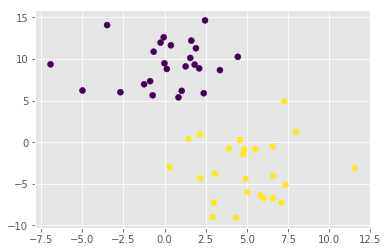

In [2]:
# Create a random set of examples
from sklearn.datasets.samples_generator import make_blobs
X, Y = make_blobs(n_samples=50, centers=2,random_state=23, cluster_std=2.90)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

A classification algorithm may be used to draw a dividing boundary
between the two clusters of points:

In [4]:
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss="hinge", alpha=0.01, max_iter=200, fit_intercept=True)
clf.fit(X, Y)

SGDClassifier(alpha=0.01, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=200, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [5]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, .05), np.arange(y_min, y_max, .05))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

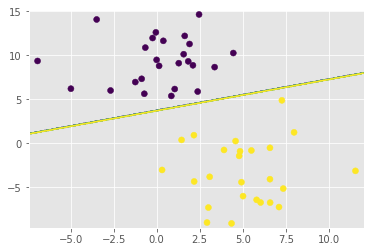

In [6]:
plt.contour(xx, yy, Z)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.show()

This may seem like a trivial task, but it is a simple version of a very important concept.
By drawing this separating line, we have learned a model which can **generalize** to new
data: if you were to drop another point onto the plane which is unlabeled, this algorithm
could now **predict** whether it's a blue or a red point.



1.2 Regression problem

Regression problems are those whom dependent variable define a continous value. Some examples are: predict the value of a house given its carachterics $X$.

Regression predictive modeling is the task of approximating a mapping function (f) from input variables (X) to a continuous output variable (y).

A continuous output variable is a real-value, such as an integer or floating point value. These are often quantities, such as amounts and sizes.

The next simple task we'll look at is a **regression** task: a simple best-fit line
to a set of data:

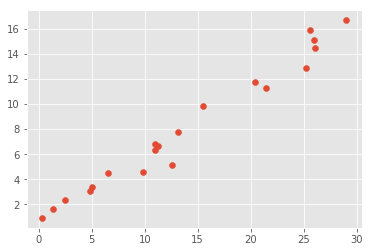

In [7]:
a = 0.5
b = 1.0

# x from 0 to 10
x = 30 * np.random.random(20)

# y = a*x + b with noise
y = a * x + b + np.random.normal(size=x.shape)

plt.scatter(x, y)

In [8]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x[:, None], y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
# underscore at the end indicates a fit parameter
print(clf.coef_)
print(clf.intercept_)

[0.5406554]
0.5148414935059176


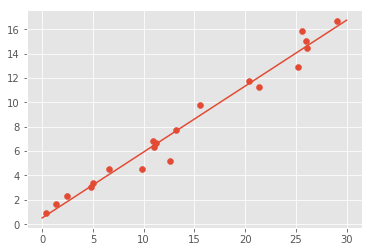

In [10]:
x_new = np.linspace(0, 30, 100)
y_new = clf.predict(x_new[:, None])
plt.scatter(x, y)
plt.plot(x_new, y_new)

Again, this is an example of fitting a model to data, such that the model can make
generalizations about new data.  The model has been **learned** from the training
data, and can be used to predict the result of test data:
here, we might be given an x-value, and the model would
allow us to predict the y value.  Again, this might seem like a trivial problem,
but it is a basic example of a type of operation that is fundamental to
machine learning tasks.